In [18]:
#Various libraries required
import numpy as np
import pandas as pd
import os
from sklearn import model_selection

#### Importing Stopwords

In [19]:
from nltk.corpus import stopwords

In [20]:
stop_word = stopwords.words("english")
print(stop_word)
len(stop_word)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

179

### Load Dataset

In [21]:
#X is a list further made in form of tuple , where first element is name of document and second is the text in documents.
#Y is the category

X  =[] 
Y = []
for category in os.listdir("./Datasets"):
    for document in os.listdir("./Datasets/"+category):
        with open("./Datasets/"+category+'/'+document, "r") as f:
            X.append((document,f.read()))
            Y.append(category)

In [22]:
#We can see it is a tuple with first element as name of document and second text of document.
print(X[0])

('49960', 'Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:49960 alt.atheism.moderated:713 news.answers:7054 alt.answers:126\nPath: cantaloupe.srv.cs.cmu.edu!crabapple.srv.cs.cmu.edu!bb3.andrew.cmu.edu!news.sei.cmu.edu!cis.ohio-state.edu!magnus.acs.ohio-state.edu!usenet.ins.cwru.edu!agate!spool.mu.edu!uunet!pipex!ibmpcug!mantis!mathew\nFrom: mathew <mathew@mantis.co.uk>\nNewsgroups: alt.atheism,alt.atheism.moderated,news.answers,alt.answers\nSubject: Alt.Atheism FAQ: Atheist Resources\nSummary: Books, addresses, music -- anything related to atheism\nKeywords: FAQ, atheism, books, music, fiction, addresses, contacts\nMessage-ID: <19930329115719@mantis.co.uk>\nDate: Mon, 29 Mar 1993 11:57:19 GMT\nExpires: Thu, 29 Apr 1993 11:57:19 GMT\nFollowup-To: alt.atheism\nDistribution: world\nOrganization: Mantis Consultants, Cambridge. UK.\nApproved: news-answers-request@mit.edu\nSupersedes: <19930301143317@mantis.co.uk>\nLines: 290\n\nArchive-name: atheism/resources\nAlt-atheism-archive-name: resourc

### Splitting the data in training and testing

In [23]:
x_train,x_test,y_train,y_test=model_selection.train_test_split(X,Y)

In [26]:
len(x_train), len(y_train)

(14997, 14997)

### Making Dictionary of words with their corresponding frequency

#### Tokenizer

In [27]:
from nltk.tokenize import RegexpTokenizer

In [28]:
## making Tokenizer
tokenizer = RegexpTokenizer('[a-z0-9]+')

#### Stemmer

In [29]:
from nltk.stem.snowball import SnowballStemmer

In [30]:
ss = SnowballStemmer("english")

In [32]:
dic={}
for i in range(len(x_train)):
    
    #taking doc in lower case
    word = x_train[i][1].lower()
    
    #splitting the text into words
    stripped = tokenizer.tokenize(word)
    
    #Iterating over each word
    for s in stripped:
        
        ## stemming
        s = ss.stem(s)
        
        #we will not include stop_words, alpha-numerics, punctuations or irrelevant word of length less than 2 in our dictionary
        if not(s.isalpha()) or s in stop_word or len(s)<=2:
            continue
        if s in dic:
            dic[s]+=1
        else:
            dic[s]=1
dic

{'path': 15339,
 'cantaloup': 19554,
 'srv': 24277,
 'cmu': 39162,
 'edu': 123002,
 'crabappl': 4666,
 'andrew': 3426,
 'news': 25591,
 'sei': 4583,
 'ece': 4031,
 'europa': 4072,
 'eng': 5118,
 'gtefsd': 4060,
 'com': 37453,
 'howland': 8280,
 'reston': 8245,
 'net': 19250,
 'noc': 4692,
 'near': 5448,
 'uunet': 4075,
 'destroy': 758,
 'ubc': 487,
 'alberta': 105,
 'kakwa': 89,
 'ualberta': 182,
 'ersi': 59,
 'outlan': 11,
 'terri': 108,
 'walter': 296,
 'edmonton': 158,
 'newsgroup': 15767,
 'misc': 8940,
 'forsal': 2129,
 'subject': 16597,
 'look': 4472,
 'messag': 16723,
 'uupcb': 201,
 'date': 15701,
 'apr': 15330,
 'gmt': 13302,
 'repli': 3536,
 'distribut': 3858,
 'world': 4152,
 'organ': 15476,
 'outland': 3,
 'bbs': 592,
 'line': 17442,
 'video': 954,
 'card': 1875,
 'ibm': 3129,
 'one': 12556,
 'allow': 1454,
 'watch': 731,
 'coax': 9,
 'digit': 668,
 'pictur': 692,
 'window': 7122,
 'would': 11962,
 'like': 8626,
 'abl': 1358,
 'rca': 15,
 'display': 1207,
 'well': 4618,
 'd

#### Sorting the dictionary on basis of frequency of words in descending order

In [33]:
import operator

In [34]:
sorted_dic = sorted(dic.items(), key=operator.itemgetter(1),reverse=True)
sorted_dic

[('edu', 123002),
 ('cmu', 39162),
 ('com', 37453),
 ('news', 25591),
 ('srv', 24277),
 ('cantaloup', 19554),
 ('net', 19250),
 ('line', 17442),
 ('messag', 16723),
 ('subject', 16597),
 ('newsgroup', 15767),
 ('date', 15701),
 ('state', 15478),
 ('organ', 15476),
 ('path', 15339),
 ('apr', 15330),
 ('gmt', 13302),
 ('one', 12556),
 ('write', 12371),
 ('use', 12188),
 ('would', 11962),
 ('ohio', 11784),
 ('refer', 11004),
 ('articl', 10440),
 ('talk', 10234),
 ('post', 10187),
 ('comp', 9842),
 ('ani', 9198),
 ('misc', 8940),
 ('like', 8626),
 ('get', 8309),
 ('howland', 8280),
 ('reston', 8245),
 ('sender', 8238),
 ('univers', 8165),
 ('peopl', 7826),
 ('know', 7504),
 ('window', 7122),
 ('nntp', 7020),
 ('think', 6871),
 ('mps', 6829),
 ('polit', 6789),
 ('host', 6780),
 ('onli', 6609),
 ('sci', 6556),
 ('time', 6554),
 ('say', 6542),
 ('system', 6422),
 ('may', 6299),
 ('usenet', 6263),
 ('zaphod', 6173),
 ('alt', 5942),
 ('make', 5833),
 ('also', 5704),
 ('doe', 5537),
 ('near', 54

## Visualising

In [35]:
import matplotlib.pyplot as plt

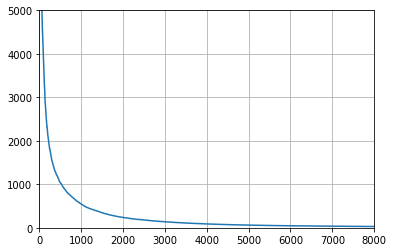

In [36]:
#Plotting graph on no. of words vs frequency 
#On basis of graph we can decide the number of features we want to take
features=sorted_dic
answer1=[]
answer2=[]
for i in range(len(features)):
    answer1.append(i)
    answer2.append(features[i][1])
plt.plot(answer1,answer2)
plt.axis([0,8000,1,5000])
plt.grid()
plt.show()   


In [38]:
#We decided to take top 2000 words with max freuqency as our feature
#here feature list is answer1
answer = [features[i][0] for i in range(2000)]
answer

['edu',
 'cmu',
 'com',
 'news',
 'srv',
 'cantaloup',
 'net',
 'line',
 'messag',
 'subject',
 'newsgroup',
 'date',
 'state',
 'organ',
 'path',
 'apr',
 'gmt',
 'one',
 'write',
 'use',
 'would',
 'ohio',
 'refer',
 'articl',
 'talk',
 'post',
 'comp',
 'ani',
 'misc',
 'like',
 'get',
 'howland',
 'reston',
 'sender',
 'univers',
 'peopl',
 'know',
 'window',
 'nntp',
 'think',
 'mps',
 'polit',
 'host',
 'onli',
 'sci',
 'time',
 'say',
 'system',
 'may',
 'usenet',
 'zaphod',
 'alt',
 'make',
 'also',
 'doe',
 'near',
 'rutger',
 'christian',
 'harvard',
 'eng',
 'work',
 'new',
 'right',
 'year',
 'want',
 'soc',
 'rec',
 'good',
 'noc',
 'crabappl',
 'well',
 'das',
 'sei',
 'xref',
 'could',
 'see',
 'max',
 'way',
 'look',
 'even',
 'need',
 'becaus',
 'comput',
 'thing',
 'god',
 'cis',
 'religion',
 'world',
 'whi',
 'problem',
 'uunet',
 'europa',
 'gtefsd',
 'ece',
 'file',
 'veri',
 'org',
 'two',
 'gov',
 'distribut',
 'much',
 'mail',
 'first',
 'mani',
 'tri',
 'call'

## Prepare Data

In [39]:
#Making x_train dataset
#No. of rows is equivalent to rows in x_train, and column is equal to length of answer(feature list)

x_train_dataset=np.zeros([len(x_train),len(answer)],int)
for i in range(len(x_train)):
    
    words = x_train[i][1].lower()
    
    ## tokkenization
    word = tokenizer.tokenize(words)
    
    #Iterating over each word
    for j in word:
        ## stemming
        j = ss.stem(j)
        
        #We will add the frequency corresponding to that word only which is in our answer(feature list)
        if j in answer:
            x_train_dataset[i][answer.index(j)] += 1

In [40]:
#Making x_test dataset
#No. of rows is equivalent to rows in x_test, and column is equal to length of answer(feature list)

x_test_dataset=np.zeros([len(x_test),len(answer)],int)

for i in range(len(x_test)):
    
    words=x_test[i][1].lower()
    ## tokenization
    word = tokenizer.tokenize(words)
    
    #Iterating over each word
    for j in word:
        ## stemming
        j = ss.stem(j)
        
        #We will add the frequency corresponding to that word only which is in our answer(feature list)
        if j in answer:
            x_test_dataset[i][answer.index(j)]+=1

In [41]:
#printing x_train and x_test dataset 
print(x_train_dataset)
print("--------------------------")
print(x_test_dataset)

[[ 5  5  1 ...  0  0  0]
 [ 9  2  0 ...  0  0  0]
 [ 7  1  0 ...  0  0  0]
 ...
 [ 6  1  3 ...  0  0  0]
 [ 9  1  2 ...  0  0  0]
 [13  1  0 ...  0  0  0]]
--------------------------
[[18  4  2 ...  0  0  0]
 [ 1  1  8 ...  0  0  0]
 [ 7  1  0 ...  0  0  0]
 ...
 [ 8  2  4 ...  0  0  0]
 [ 9  5  0 ...  0  0  0]
 [15  3  4 ...  0  0  0]]


## Inbuilt sklearn Naive Bayes

In [42]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [43]:
#Demonstrating confusion-matrix and classification report

clf=MultinomialNB()

clf.fit(x_train_dataset,y_train)

y_pred=clf.predict(x_test_dataset)

print("Score on training data:",clf.score(x_train_dataset,y_train))

print("Score on testing data:",clf.score(x_test_dataset,y_test))

print(confusion_matrix(y_test,y_pred))

print(classification_report(y_test,y_pred))


Score on training data: 0.8914449556577982
Score on testing data: 0.8602
[[190   0   1   0   0   0   0   3   2   0   0   0   0   0   1   5   0   3
    1  30]
 [  1 182  15  17  11   6   7   3   2   0   0   1   1   2   2   0   0   0
    0   0]
 [  0   2 196  21   1  10   2   1   0   0   0   1   0   0   0   0   0   0
    0   0]
 [  1   3   5 223  33   0   7   0   0   0   0   0   4   0   0   0   0   0
    0   0]
 [  0   1   0  21 224   0   5   0   0   0   0   0   5   0   0   0   0   0
    0   0]
 [  0  18  23   6   8 175   6   0   1   0   0   1   3   1   3   0   0   0
    0   0]
 [  0   0   0   3   3   0 226   2   0   0   0   0   2   0   1   0   0   0
    0   0]
 [  0   0   0   0   0   0   9 218   7   0   0   0   2   0   0   0   1   0
    0   0]
 [  0   0   0   0   0   0   5   8 235   0   0   0   1   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   0   8   2   3 270   4   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   0   2   3   1   3 247   0   0   0   1   0   0   0
   

## Self Implementation of Naive Baye's

In [50]:
#Making dictionary for implementing Naive Baye's

def fit(x_train_dataset,y_train):
    
    count={} ## dict
    
    total_word=0
    
    y_train=np.array(y_train)
    
    #Total no. of document is calculated
    count["total_doc"]=len(y_train)
    
    classes=set(y_train)
    for i in classes:
        temp=0
        
        #selecting x_train corresponding to class present in y_train
        x_train_with_i=x_train_dataset[y_train==i]
        
        #finding length of data with category corresponding to i 
        temp2=x_train_with_i.shape[0]
        
        count[i]={}
        
        #Iterating over answer(actual feature list)
        for feature in answer:
            
            #Calculating total word in feature
            l=(x_train_with_i[:,answer.index(feature)]).sum()
            
            count[i][feature]=l
            temp+=l
            
        #Total word in that class
        count[i]["word_in_class"]=temp
        
        #Length of data with y_train belonging to specific class
        count[i]["length"]=temp2
        
    
    return count


In [51]:
def probability(x_test,dic,classes):
    
    prob=np.log(dic[classes]["length"])-np.log(dic["total_doc"])
    
    feature=list(dic[classes].keys())
    
    #-2 is done becuase there will be "length" and "word in class" present in feature. 
    for j in range (len(feature)-2):
        xj=x_test[j]
        
        #If frequency is 0, we will not consider it
        if xj==0:
            current_prob=0
        else:
            
            #Extra addition part is Laplace correction
            num=dic[classes][feature[j]]+1
            den=dic[classes]["word_in_class"]+len(dic[classes].keys())-2
            current_prob=np.log(num)-np.log(den)
            
        prob += current_prob
        
    return prob
    

In [52]:
#Best_class or probable answer will be returned from here
def predict_for_single(x_test,dic):
    
    first_run=True
    
    classes=dic.keys()
    for i in classes:
        if i=="total_doc":
            continue
            
        prob=probability(x_test,dic,i)
        
        if first_run or prob>best_prob:
            best_prob=prob
            first_run=False
            best_class=i
            
    return best_class

In [53]:
def predict_(x_test,dic):
    
    y_pred=[]
    
    for x in x_test:
        y_pred.append(predict_for_single(x,dic))
        
    return y_pred

In [54]:
def score(y_test,y_pred):
    
        count = 0
        for i in range(len(y_pred)):
            if y_pred[i] == y_test[i]:
                count+=1
                
        return count/len(y_pred)

In [55]:
#run
dictionary=fit(x_train_dataset,y_train)
y_pred=predict_(x_test_dataset,dictionary)


In [56]:
dictionary

{'total_doc': 14997,
 'talk.politics.guns': {'edu': 7346,
  'cmu': 2419,
  'com': 2829,
  'news': 1412,
  'srv': 1342,
  'cantaloup': 1008,
  'net': 810,
  'line': 842,
  'messag': 800,
  'subject': 801,
  'newsgroup': 778,
  'date': 783,
  'state': 1380,
  'organ': 806,
  'path': 753,
  'apr': 785,
  'gmt': 688,
  'one': 667,
  'write': 863,
  'use': 602,
  'would': 951,
  'ohio': 881,
  'refer': 695,
  'articl': 718,
  'talk': 1388,
  'post': 592,
  'comp': 2,
  'ani': 568,
  'misc': 276,
  'like': 567,
  'get': 484,
  'howland': 425,
  'reston': 426,
  'sender': 358,
  'univers': 381,
  'peopl': 785,
  'know': 349,
  'window': 20,
  'nntp': 392,
  'think': 468,
  'mps': 487,
  'polit': 1446,
  'host': 376,
  'onli': 422,
  'sci': 5,
  'time': 383,
  'say': 400,
  'system': 163,
  'may': 170,
  'usenet': 532,
  'zaphod': 425,
  'alt': 459,
  'make': 406,
  'also': 264,
  'doe': 202,
  'near': 203,
  'rutger': 12,
  'christian': 22,
  'harvard': 153,
  'eng': 364,
  'work': 113,
  'ne

In [57]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [58]:
print("Score on testing_data:",score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))


Score on testing_data: 0.8672
[[206   0   1   0   0   0   0   3   0   0   0   0   0   0   1   3   0   1
    3  18]
 [  0 190   9  18  15   5   5   1   0   0   0   1   4   2   0   0   0   0
    0   0]
 [  0  14 172  21   8  12   4   0   0   0   0   1   2   0   0   0   0   0
    0   0]
 [  0   5   1 229  31   0   5   0   0   0   0   0   5   0   0   0   0   0
    0   0]
 [  0   1   0  17 231   0   4   0   0   0   0   0   3   0   0   0   0   0
    0   0]
 [  0  20  24   5   8 176   3   0   2   0   0   1   3   1   2   0   0   0
    0   0]
 [  0   1   0   3   2   0 220   6   0   0   0   0   2   1   2   0   0   0
    0   0]
 [  0   0   0   0   0   0   9 216   6   0   0   0   2   0   0   0   3   0
    1   0]
 [  0   0   0   0   0   0   5   7 236   0   0   0   0   0   1   0   0   0
    0   0]
 [  0   0   0   0   0   0   5   0   0 278   4   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   0   1   2   1   2 251   0   0   0   0   0   0   0
    1   0]
 [  0   0   1   0   0   0   0   0  

## END